In [11]:
%reload_ext autoreload
%autoreload 2

import sys

sys.path.append(".")
sys.path.append("..")
sys.path.append("../..")

In [12]:
from uniflow.flow.client import TransformClient
from uniflow.flow.config import TransformCopyConfig, TransformExpandConfig
from uniflow.flow.flow_factory import FlowFactory
from uniflow.viz import Viz

In [13]:
FlowFactory.list()

{'extract': ['ExtractImageFlow',
  'ExtractIpynbFlow',
  'ExtractMarkdownFlow',
  'ExtractPDFFlow',
  'ExtractTxtFlow',
  'ExtractS3TxtFlow'],
 'transform': ['TransformAzureOpenAIFlow',
  'TransformCopyFlow',
  'TransformHuggingFaceFlow',
  'TransformLMQGFlow',
  'TransformOpenAIFlow',
  'TransformExpandFlow'],
 'rater': ['RaterFlow']}

In [23]:
# client = TransformClient(TransformCopyConfig())
client = TransformClient(TransformExpandConfig(split_func="half_split"))
input = [{"a": 1, "b": 2}, {"c": 3, "d": 4}, {"e": 5, "f": 6}, {"g": 7, "h": 8}]
output = client.run(input)

config:  TransformExpandConfig(flow_name='TransformExpandFlow', model_config={}, num_thread=1, prompt_template=PromptTemplate(instruction='', few_shot_prompt=[]))
transform client config:  TransformExpandConfig(flow_name='TransformExpandFlow', model_config={}, num_thread=1, prompt_template=PromptTemplate(instruction='', few_shot_prompt=[]))
transform server config:  TransformConfig(flow_name='TransformExpandFlow', model_config={}, num_thread=1, prompt_template=PromptTemplate(instruction='', few_shot_prompt=[]), split_func='half_split')
server flow_name:  TransformExpandFlow


100%|██████████| 4/4 [00:00<00:00, 38836.15it/s]


In [24]:
print(client._config)

TransformExpandConfig(flow_name='TransformExpandFlow', model_config={}, num_thread=1, prompt_template=PromptTemplate(instruction='', few_shot_prompt=[]))


In [25]:
output

[{'output': [{'a': 1}, {'b': 2}], 'root': <uniflow.node.Node at 0x115df23b0>},
 {'output': [{'c': 3}, {'d': 4}], 'root': <uniflow.node.Node at 0x115c380a0>},
 {'output': [{'e': 5}, {'f': 6}], 'root': <uniflow.node.Node at 0x115df23e0>},
 {'output': [{'g': 7}, {'h': 8}], 'root': <uniflow.node.Node at 0x115df34f0>}]

In [26]:
graph = Viz.to_digraph(output[0]["root"])

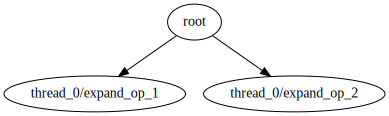

In [27]:
# for mac: brew install graphviz
display(graph)

In [28]:
graph = Viz.to_digraph(output[1]["root"])

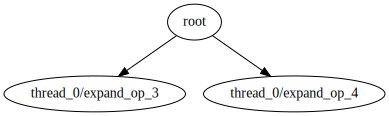

In [29]:
# for mac: brew install graphviz
display(graph)